In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [2]:
#load data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
497,2014,HONDA,FIT,STATION WAGON - SMALL,1.5,4,M5,X,8.3,6.9,7.7,37,177
140,2014,BUICK,ENCLAVE,SUV - STANDARD,3.6,6,A6,X,14.3,9.9,12.3,23,283
900,2014,PORSCHE,CAYMAN S,TWO-SEATER,3.4,6,M6,Z,11.9,8.6,10.4,27,239
167,2014,CADILLAC,CTS SEDAN AWD,MID-SIZE,3.6,6,AS6,X,13.1,9.0,11.3,25,260
400,2014,FORD,FOCUS,COMPACT,2.0,4,M6,X,10.2,7.4,8.9,32,205


In [3]:
#explore the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#view selected features
cdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(5)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
97,6,3.0,10.3,237
178,8,6.2,14.8,340
395,4,1.6,7.0,161
258,4,1.4,7.9,182
981,6,4.0,13.9,320


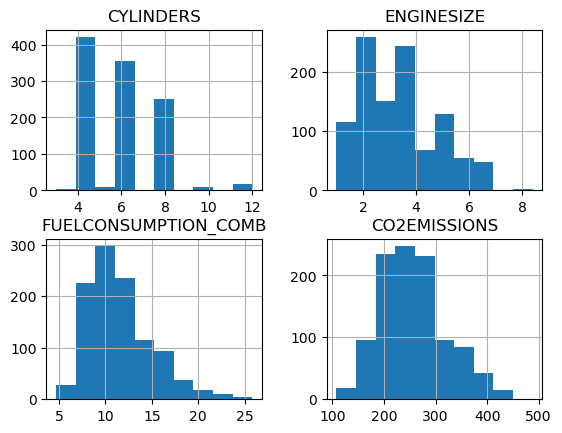

In [5]:
#visualize features
cdf.hist()
plt.show()

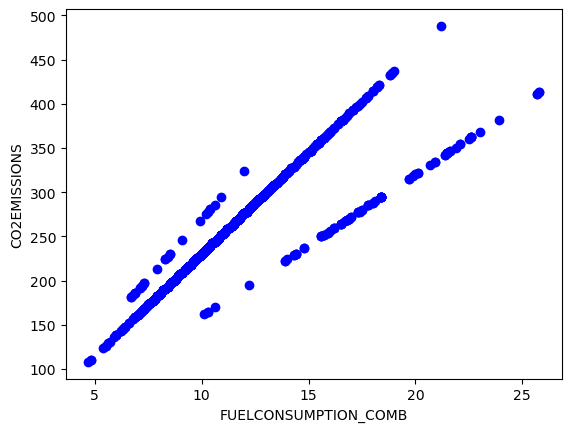

In [6]:
# display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [7]:
#This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.

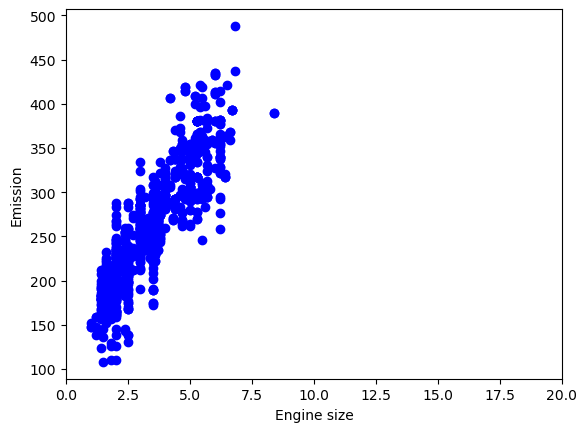

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,20)
plt.show()

In [9]:
# Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.

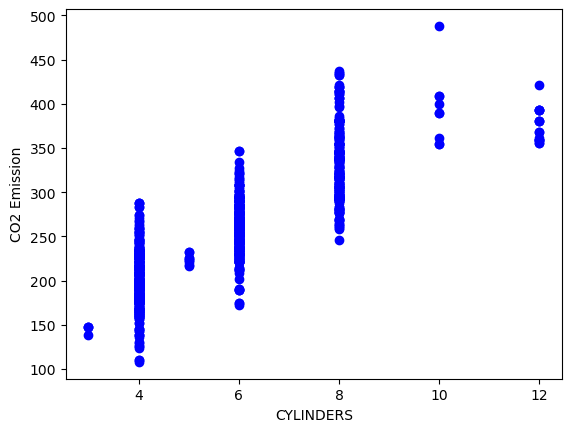

In [10]:
#Plot CYLINDER against CO2 Emission, to see how linear their relationship is.
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

In [11]:
#Extract Features
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [12]:
#create training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [13]:
#Build a linear regression model
lm=LinearRegression()
#traun the model
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
lm.fit(X_train.reshape(-1, 1),y_train)
#Print slope and intercept
print("Coefficient: ", lm.coef_[0])
print("Intercept: ",lm.intercept_)

Coefficient:  38.992978724434046
Intercept:  126.2897021740873


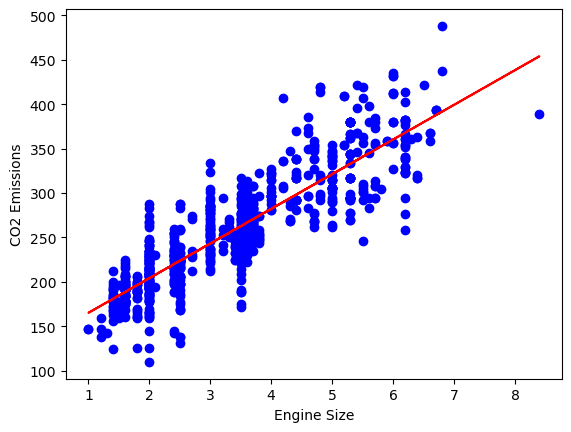

In [14]:
#Visualize the model output
plt.scatter(X_train,y_train, color='blue')
line_plot = lm.coef_*X_train + lm.intercept_   #y=mx+c
plt.plot(X_train, line_plot, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [15]:
#evaluate the accuracy of the model based on test data
y_test_ = lm.predict(X_test.reshape(-1, 1))
mae = mean_absolute_error(y_test_, y_test)
mse = mean_squared_error(y_test_, y_test)
rmse = root_mean_squared_error(y_test_, y_test)
r2score = r2_score(y_test_, y_test)
print('Mean Absolute Error:  %.2f'% mae)
print('Mean Squared Error:  %.2f' % mse)
print('Root Mean Squared Error:  %.2f' % rmse)
print('R2-score:  %.2f' % r2score)

Mean Absolute Error:  24.10
Mean Squared Error:  985.94
Root Mean Squared Error:  31.40
R2-score:  0.68


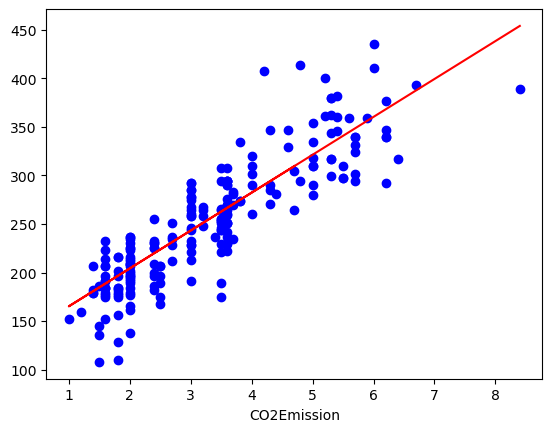

In [16]:
#lot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good
plt.scatter(X_test, y_test, color='blue')
test_line_plot = X_test*lm.coef_ + lm.intercept_
plt.plot(X_test, test_line_plot,'-r')
plt.xlabel('Engine Size')
plt.xlabel('CO2Emission')
plt.show()

In [17]:
#Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.
X = cdf.FUELCONSUMPTION_COMB.to_numpy() # ADD CODE
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) #ADD CODE

In [18]:
#Train a linear regression model using the training data you created.
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1),y_train)


LinearRegression()

In [19]:
#Use the model to make test predictions on the fuel consumption testing data
y_test_ = reg.predict(X_test.reshape(-1,1))

In [20]:
#Calculate and print the Mean Squared Error of the test predictions.
mse_reg = mean_squared_error(y_test_, y_test)
print("Mean Squared Error: %.2f" % mse_reg)

Mean Squared Error: 797.43
